/Users/nakamurayota/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 1296x1296 with 0 Axes>

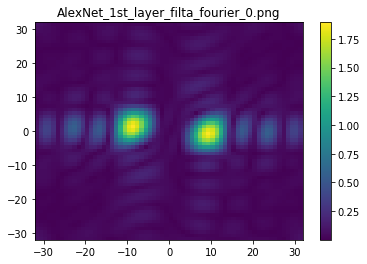

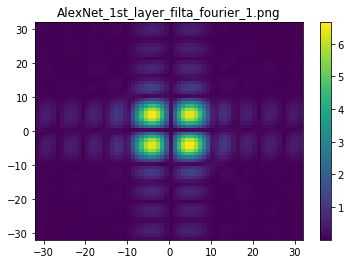

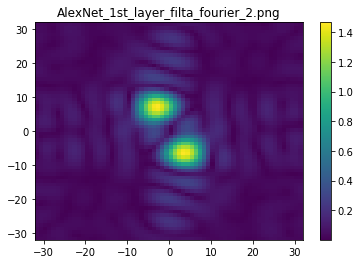

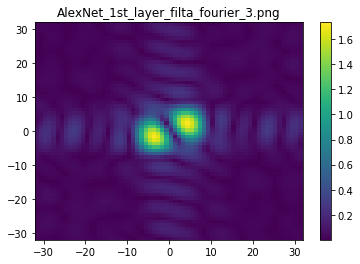

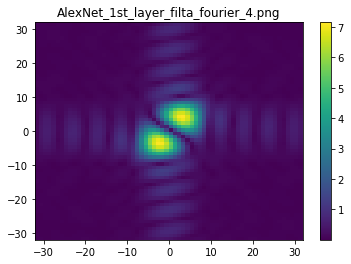

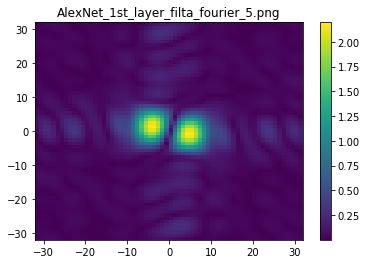

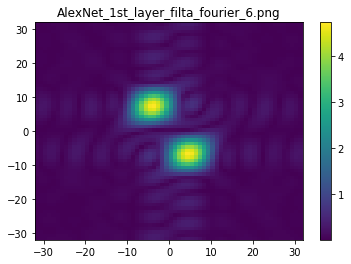

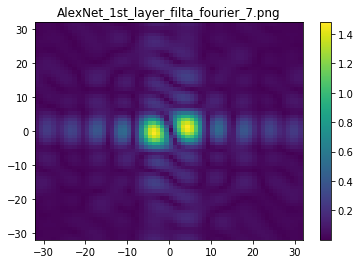

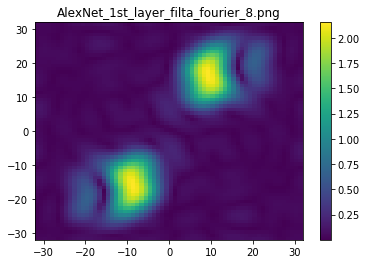

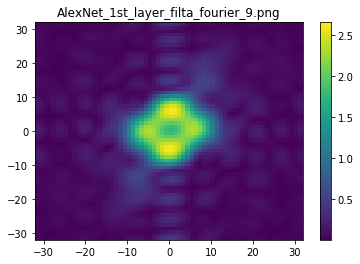

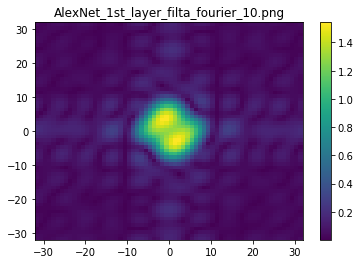

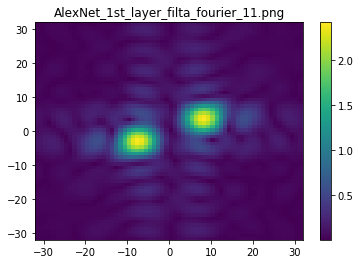

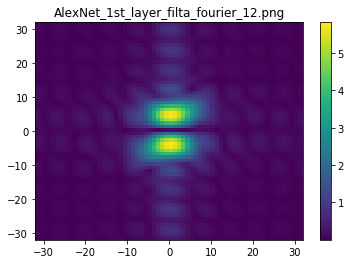

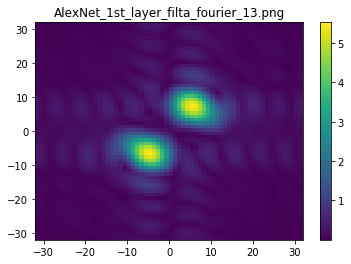

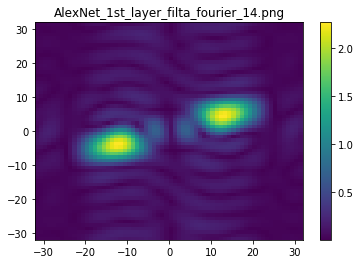

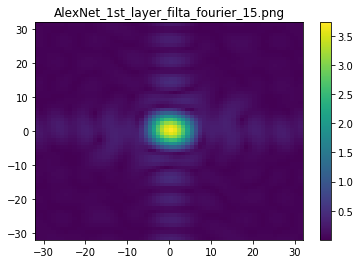

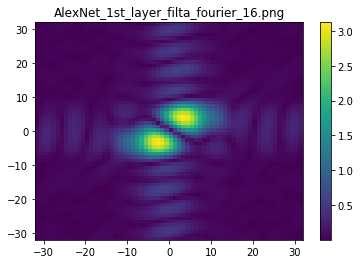

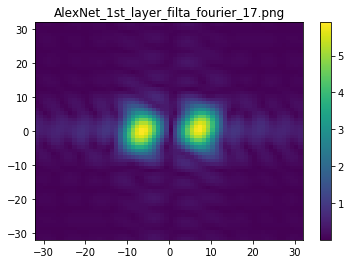

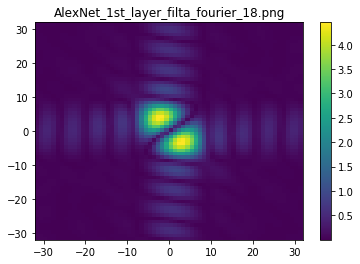

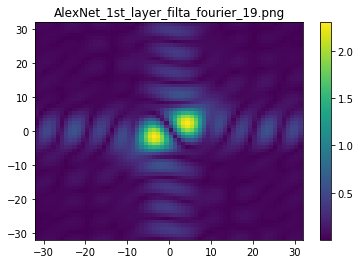

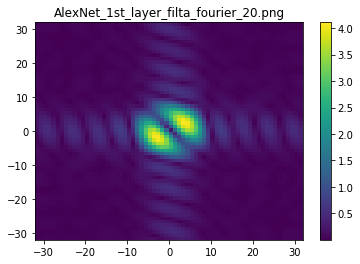

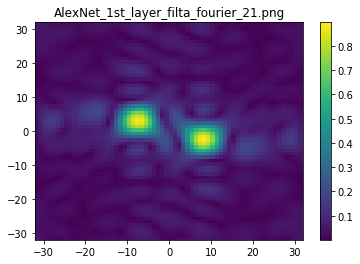

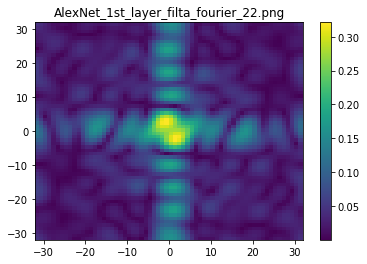

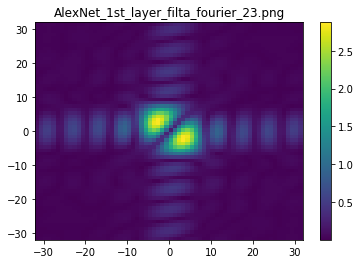

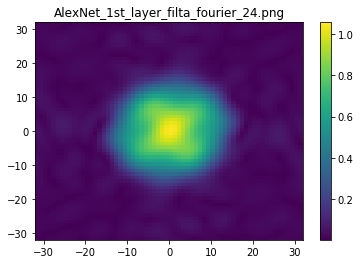

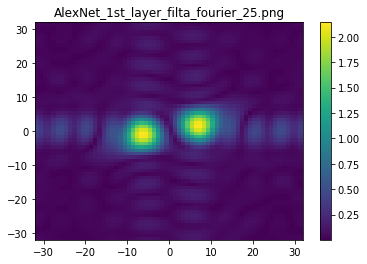

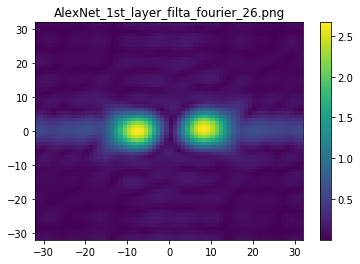

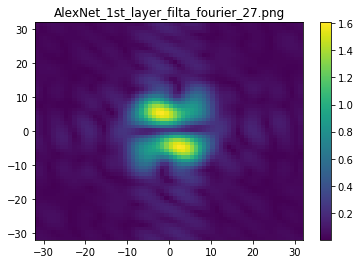

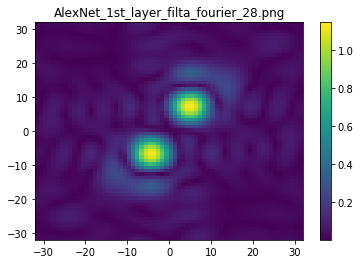

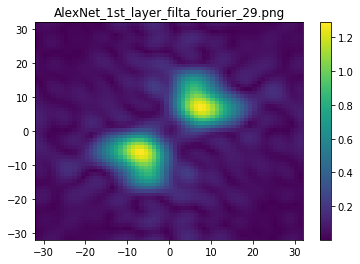

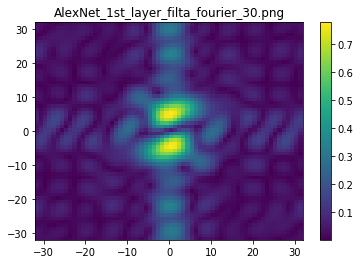

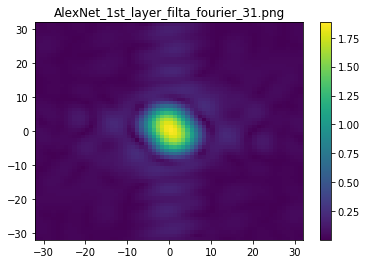

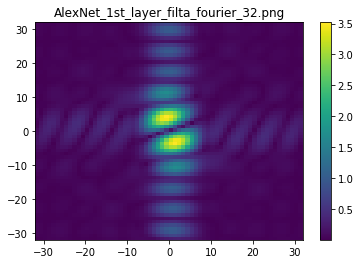

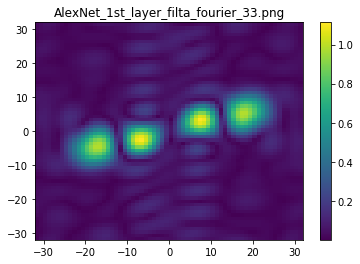

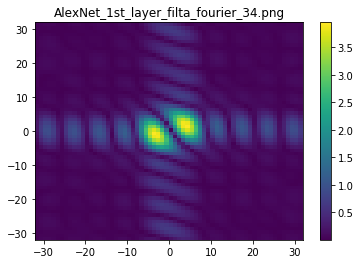

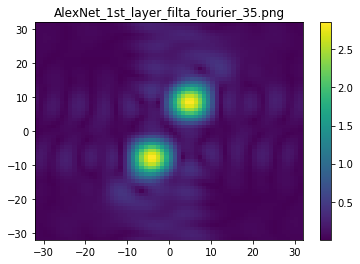

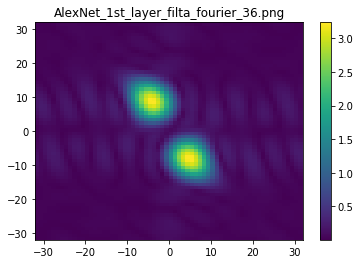

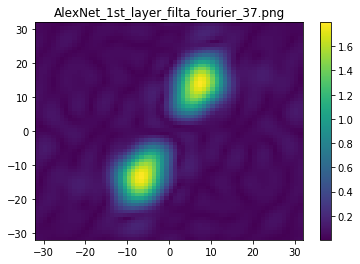

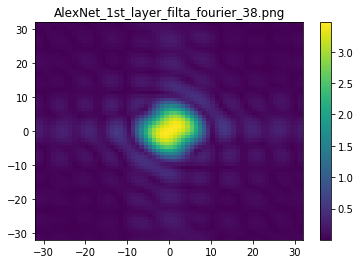

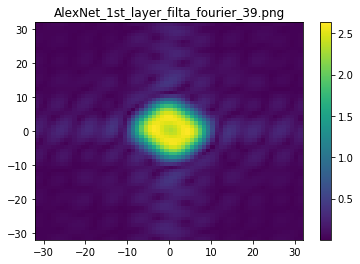

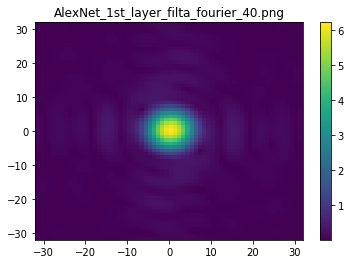

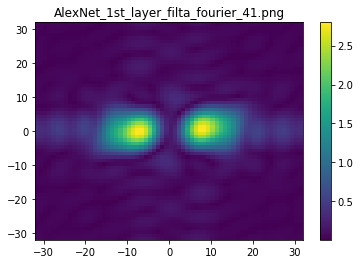

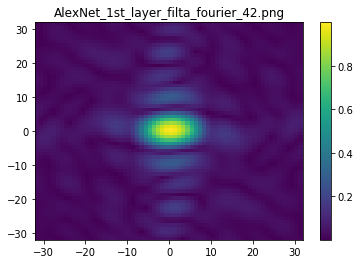

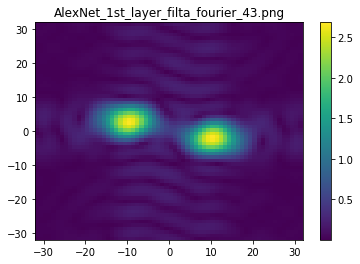

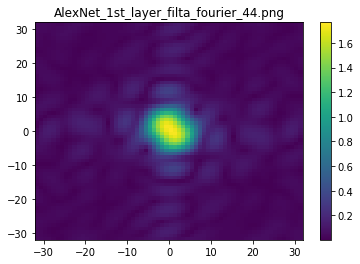

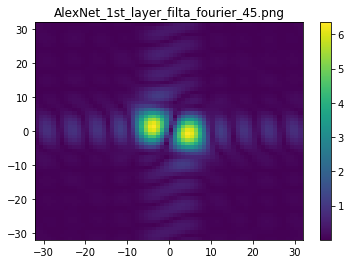

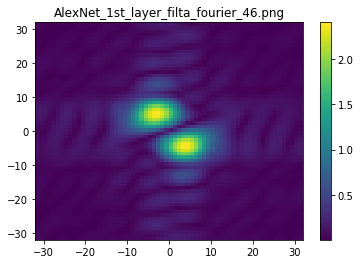

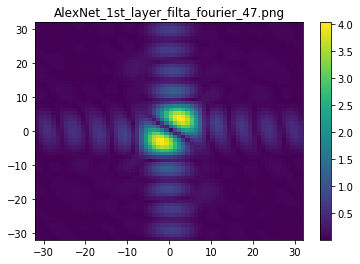

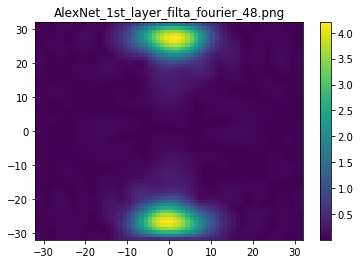

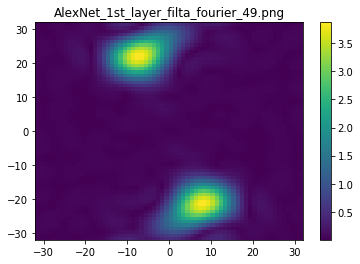

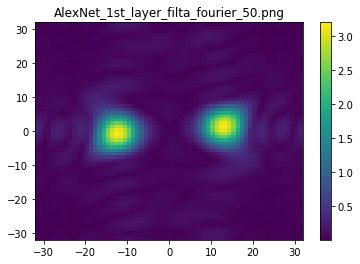

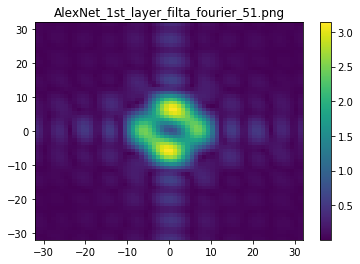

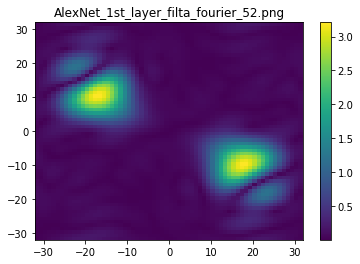

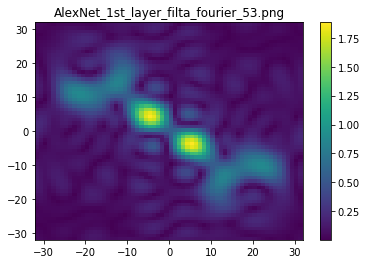

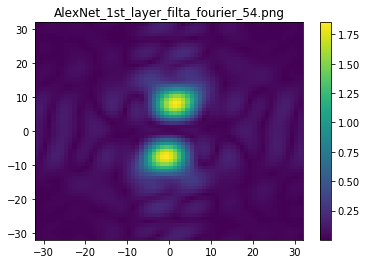

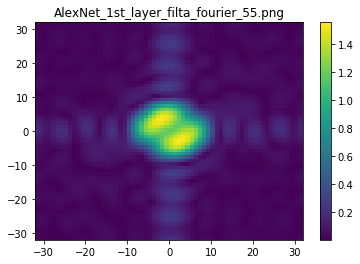

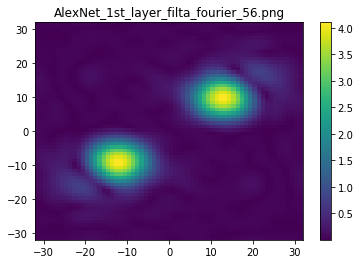

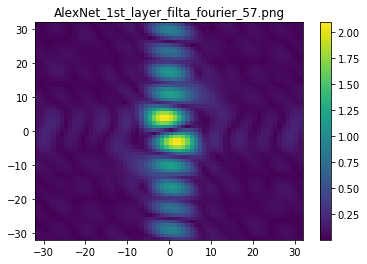

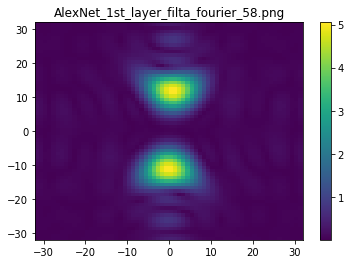

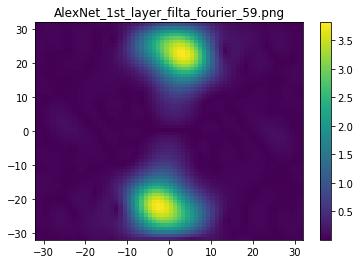

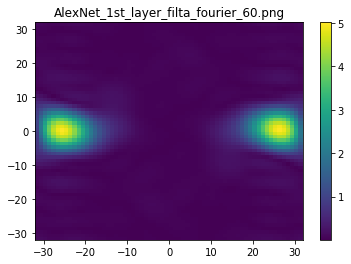

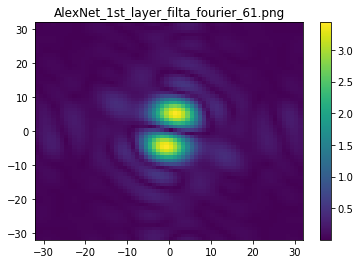

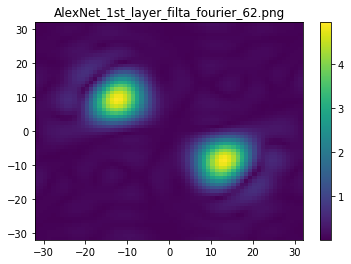

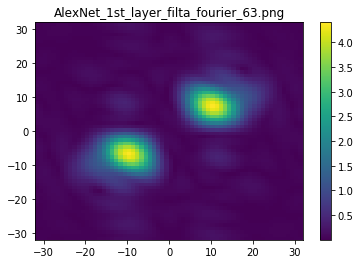

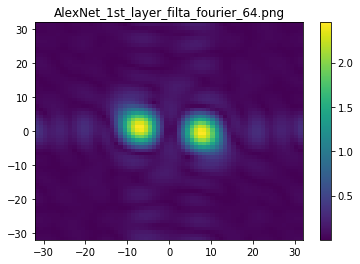

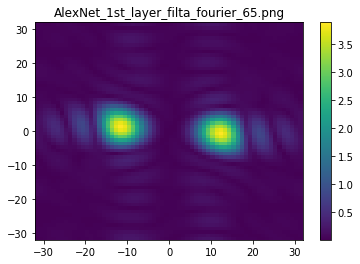

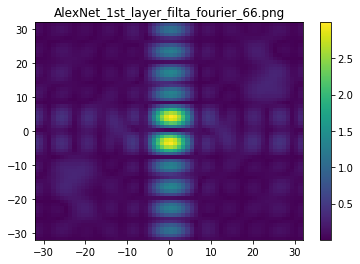

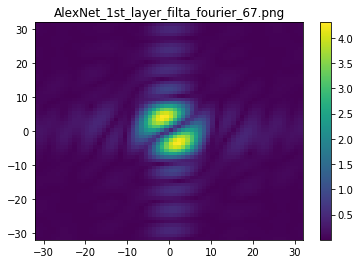

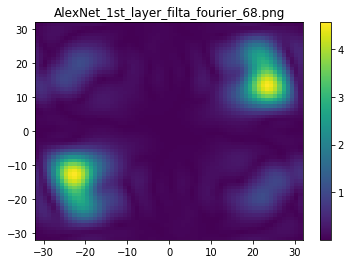

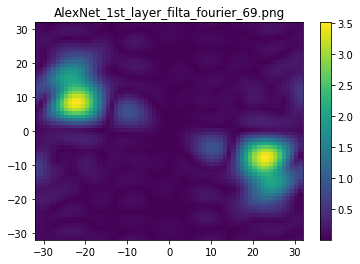

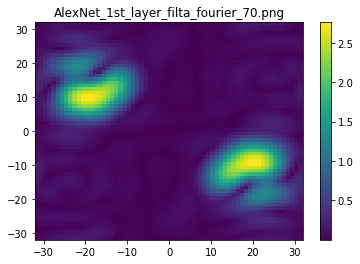

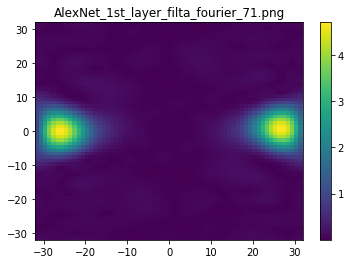

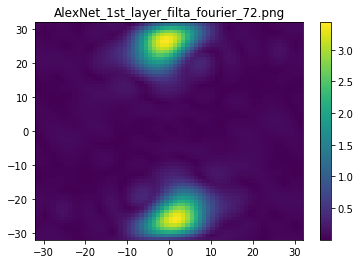

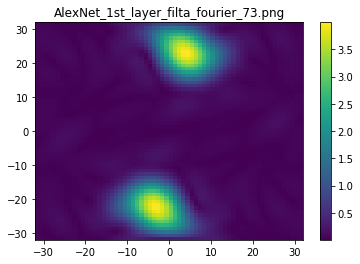

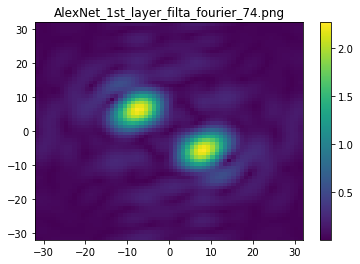

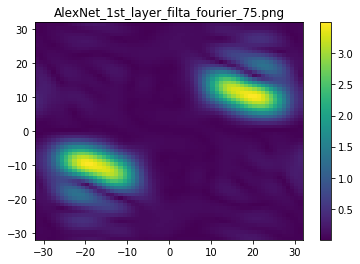

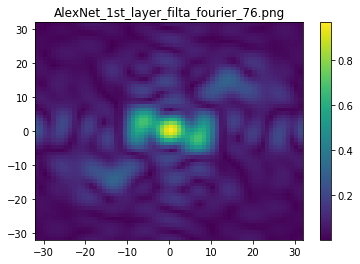

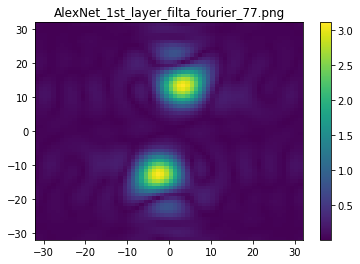

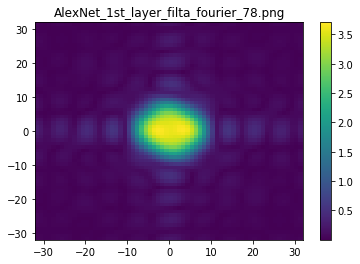

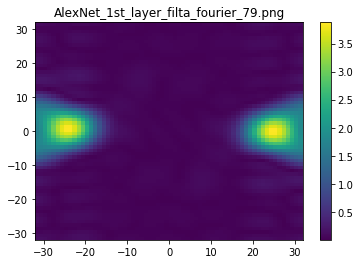

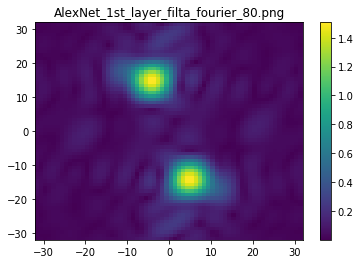

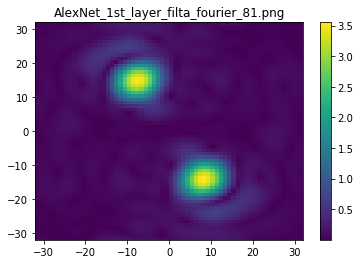

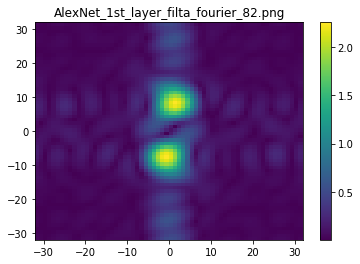

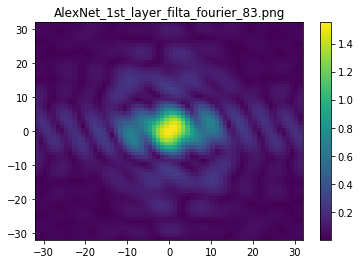

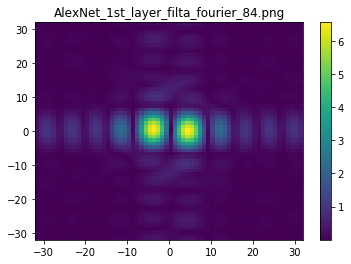

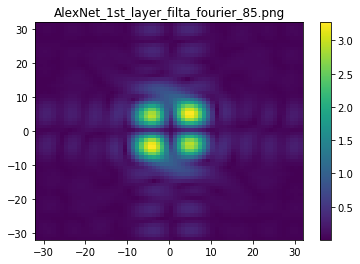

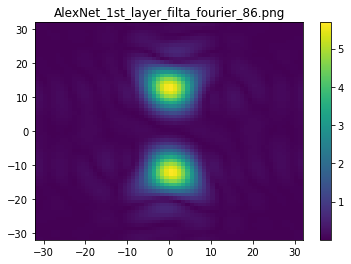

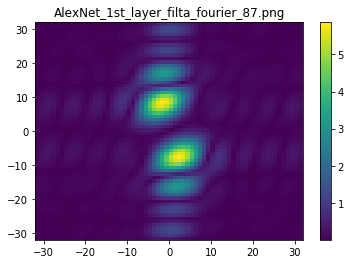

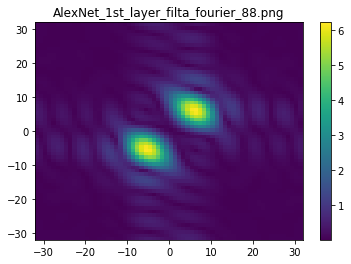

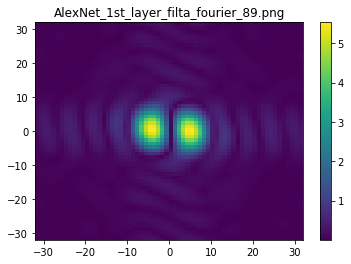

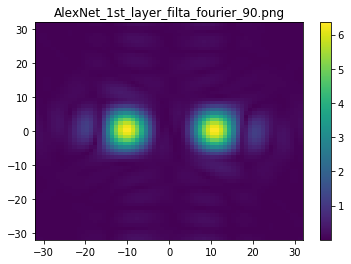

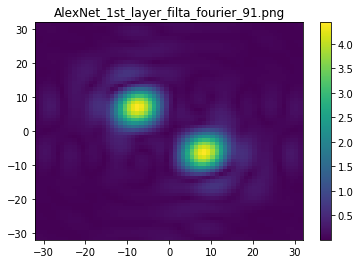

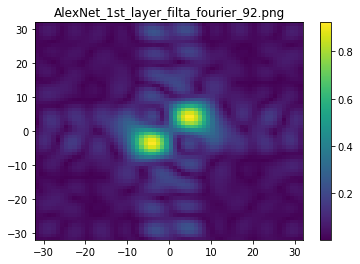

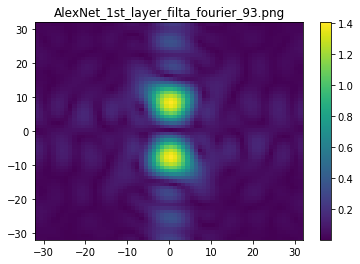

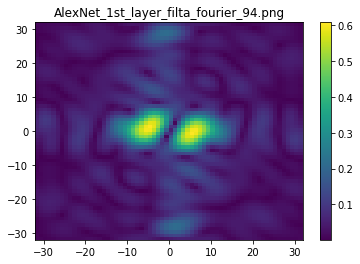

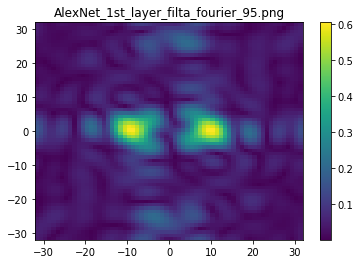

In [1]:
#just copy and paste
#RGBそれぞれ

import numpy as np
import matplotlib.pyplot as plt

weight_1layer_alexnet = np.load("weight_1layer_alexnet.npy")
target_layer_weight = weight_1layer_alexnet[0]
# weight_1layer_alexnet[1]はバイアス


#(11,11,3,96),,,,,,,,,,,,


fig = plt.figure(figsize=(18,18))
num_filta = len(target_layer_weight[0,0,0,:])  #96
num_channel = len(target_layer_weight[0,0,:,0])  #3

from mpl_toolkits.mplot3d import Axes3D   
import matplotlib.pyplot as plt 
import numpy as np
from pylab import *



max_indexes = np.empty(shape=(96))

#96
for filta_th in arange(96):
    weight081 = target_layer_weight[:,:,0,filta_th]
    ffted_weight081= np.fft.fft2(weight081,s=[65,65])
    ffted_shifted_weight081= np.fft.fftshift(ffted_weight081)
    abs_ffted_weight081 = abs(ffted_shifted_weight081)
    z=abs_ffted_weight081
    x = arange(-32,33)
    y = arange(-32,33)
    Z=z
    a = arange(64, -1, -1)
    b = arange(0, 65, 1)
    Z[b,:] = Z[a,:]
    Z_1_2_quadrant = Z[0:33,:]    
    max_indexes[filta_th] = np.argmax(Z_1_2_quadrant)
    
    
    figure()
    X, Y = meshgrid(x, y)
    pcolor(X, Y,Z)
    plt.colorbar()
    plt.title('AlexNet_1st_layer_filta_fourier_'+str(filta_th)+'.png')
    #plt.savefig('AlexNet_1st_layer_filta_fourier_'+str(filta_th)+'.png')
plt.show()



In [3]:
#interpolate
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]
from scipy.interpolate import griddata
grid0 = griddata([x,y],Z,(grid_x,grid_y),method="linear")

ValueError: different number of values and points

In [11]:
print(Z.shape)

(65, 65)
